In [1]:
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt

In [19]:
def construct_directed_graph(current_course, coefs, breadth, depth, G):
    if (depth == 0):
        return
    depth -= 1
    if (len(coefs.loc[(coefs['Unnamed: 0'] == current_course)]) < 1):
        return
    sorted_predictors = coefs.loc[(coefs['Unnamed: 0'] == current_course)].iloc[0][1:].sort_values(ascending=False)
    top_predictors = sorted_predictors[:breadth]
    for index, value in top_predictors.items():
        if (not math.isnan(value) and value > 0 and not G.has_edge(index, current_course)):
            G.add_node(index)
            G.add_edge(index, current_course)
            construct_directed_graph(index, coefs, breadth, depth, G)
            

In [28]:
#Computing of the graph
coefs_path = '../results/lasso_coefs_full.csv'
coefs = pd.read_csv(coefs_path)
G = nx.DiGraph()
target_course = 'CS229'
G.add_node(target_course)
construct_directed_graph(target_course, coefs, 3, 10, G)

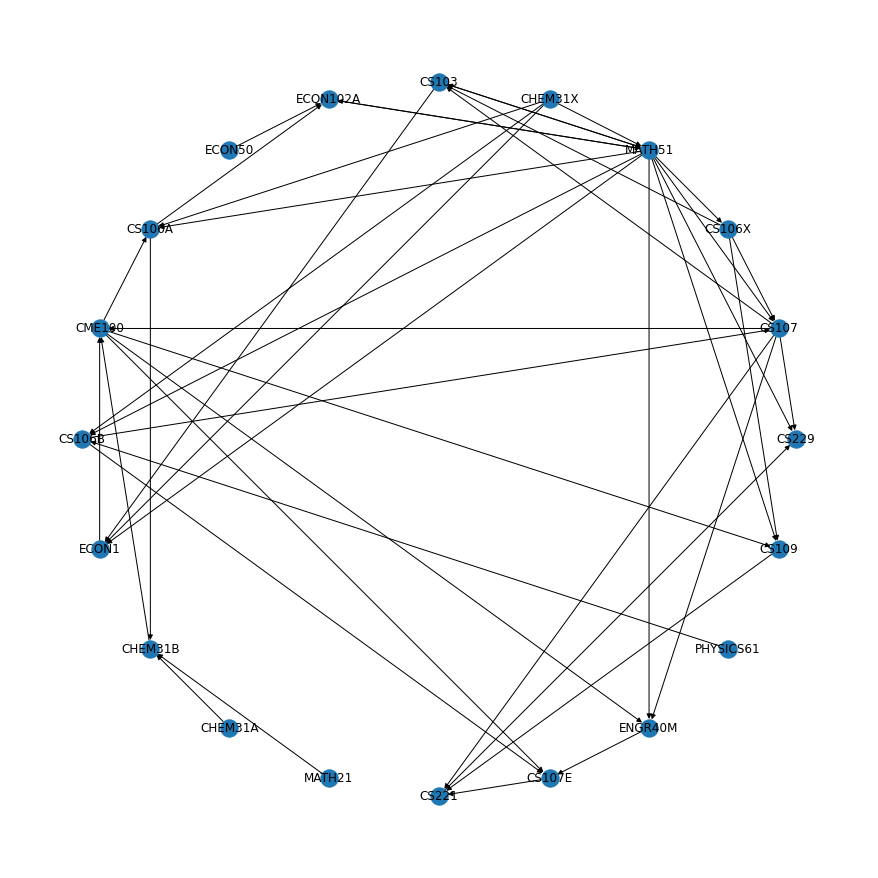

In [29]:
#Drawing of the graph
plt.figure(figsize=(12,12)) 
pos=nx.circular_layout(G)
nx.draw(G, pos=pos)
labels=nx.draw_networkx_labels(G, pos=pos)

In [30]:
coefs.loc[(coefs['Unnamed: 0'] == 'CS221')].iloc[0][1:].sort_values(ascending=False)[:3]

CS107E      1.2755
CS107      1.05316
CS109     0.729204
Name: 147, dtype: object

In [2]:
print(nx.__version__)

2.5
